In [ ]:
from google.colab import drive
drive.mount('/drive')

import os
os.chdir('/drive/My Drive/DOTE6635')
print("当前工作目录:", os.getcwd())


Mounted at /drive
当前工作目录: /drive/My Drive/DOTE6635


In [ ]:
import pandas as pd

# Specify the encoding when reading the CSV file
catagory = pd.read_csv('catagory.csv', encoding='gbk')  # Try 'gbk' or 'latin-1' if 'gbk' doesn't work

# Get the number of rows and columns.
num_rows = catagory.shape[0]
num_cols = catagory.shape[1]

print(f"The 'catagory' DataFrame has {num_rows} rows and {num_cols} columns.")

# Get data types of each column.
print("\nData types of each column:")
print(catagory.dtypes)

# Display the first few rows of the DataFrame.
print("\nFirst few rows of the DataFrame:")
print(catagory.head())

The 'catagory' DataFrame has 40 rows and 3 columns.

Data types of each column:
Category     object
Product      object
Price($)    float64
dtype: object

First few rows of the DataFrame:
                   Category  \
0                FruitJuice   
1               FruitDrinks   
2  BabyMilkandMilkFlavoring   
3                      Soup   
4           CatFood-WetType   

                                             Product  Price($)  
0  Capri Sun Variety Pack with Fruit Punch, Straw...      9.43  
1  Kool Aid Jammers Variety Pack with Tropical Pu...      7.27  
2  Horizon Organic Shelf-Stable Whole Milk Boxes,...     13.98  
3  Maruchan Ramen Noodle Chicken Flavor Soup, 3 O...      9.97  
4  Purina Fancy Feast Chicken Feast Classic Grain...      0.88  


In [ ]:
# prompt: 对于每一个catagory以及对应的product，以及价格，生成一系列vary price 这个价格为对应价格vary the price from
# #  0 to 200% of the regular price, in 20% increments. This gives us 11 price points to test for each product
# #  ({0, 20%,..100%,..200%} of the regular price，所以，我们一共要生成11列vary price 分别对应0%到200% 最后每一个数组记录catagory，product，常规价格（即未变动前的价格）以及vary price， 列名分别为为vary price（20%），vary price（40%）以此类推，最后让我看一眼数据

from google.colab import drive
import os
import pandas as pd
import random

drive.mount('/drive')
os.chdir('/drive/My Drive/DOTE6635')
print("Current working directory:", os.getcwd())

try:
    catagory = pd.read_csv('catagory.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        catagory = pd.read_csv('catagory.csv', encoding='latin-1')
    except UnicodeDecodeError:
        catagory = pd.read_csv('catagory.csv', encoding='gbk')

data = []
for index, row in catagory.iterrows():
    category = row['Category']
    product = row['Product']
    original_price = row['Price($)']

    # Create varied prices
    varied_prices = [original_price * (i * 0.2) for i in range(11)]

    data.append([category, product, original_price] + varied_prices)

# Create column names
columns = ['Category', 'Product', 'Original Price']
for i in range(11):
    columns.append(f'Vary Price ({i*20}%)')

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
df


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
Current working directory: /drive/My Drive/DOTE6635


,Category,Product,Original Price,Vary Price (0%),Vary Price (20%),Vary Price (40%),Vary Price (60%),Vary Price (80%),Vary Price (100%),Vary Price (120%),Vary Price (140%),Vary Price (160%),Vary Price (180%),Vary Price (200%)
0,FruitJuice,"Capri Sun Variety Pack with Fruit Punch, Straw...",9.43,0.0,1.886,3.772,5.658,7.544,9.43,11.316,13.202,15.088,16.974,18.86
1,FruitDrinks,Kool Aid Jammers Variety Pack with Tropical Pu...,7.27,0.0,1.454,2.908,4.362,5.816,7.27,8.724,10.178,11.632,13.086,14.54
2,BabyMilkandMilkFlavoring,"Horizon Organic Shelf-Stable Whole Milk Boxes,...",13.98,0.0,2.796,5.592,8.388,11.184,13.98,16.776,19.572,22.368,25.164,27.96
3,Soup,"Maruchan Ramen Noodle Chicken Flavor Soup, 3 O...",9.97,0.0,1.994,3.988,5.982,7.976,9.97,11.964,13.958,15.952,17.946,19.94
4,CatFood-WetType,Purina Fancy Feast Chicken Feast Classic Grain...,0.88,0.0,0.176,0.352,0.528,0.704,0.88,1.056,1.232,1.408,1.584,1.76
5,PetSupplies-DogFood,"Purina Dog Chow Complete, Dry Dog Food for Adu...",29.17,0.0,5.834,11.668,17.502,23.336,29.17,35.004,40.838,46.672,52.506,58.34
6,Snacks-PotatoChips,"Lay¡¯s Classic Potato Snack Chips, Party Size,...",5.44,0.0,1.088,2.176,3.264,4.352,5.44,6.528,7.616,8.704,9.792,10.88
7,Snacks-TortillaChips,"Doritos Nacho Cheese Tortilla Snack Chips, Par...",5.94,0.0,1.188,2.376,3.564,4.752,5.94,7.128,8.316,9.504,10.692,11.88
8,Cereal-ReadytoEat,"Cinnamon Toast Crunch Breakfast Cereal, Crispy...",4.93,0.0,0.986,1.972,2.958,3.944,4.93,5.916,6.902,7.888,8.874,9.86
9,Cookies,"Little Debbie Oatmeal Creme Pies, 12 ct, 16.2 oz",2.68,0.0,0.536,1.072,1.608,2.144,2.68,3.216,3.752,4.288,4.824,5.36


In [ ]:
# prompt: 阅读路径下名为tresponses.csv的文件，首先获得tresponses.csv的行数，对于每一行的单元格数据，按照逗号分隔文本获得对应的变量，变量名为： ['Age', 'Gender', 'Education', 'Income', 'Occupation', 'Ethnicity', 'Marital Status', 'Household Size', 'Num Children', 'State', 'Home Ownership', 'Purchase Frequency', 'Last Price', 'Storage Space', 'Grocery Budget', 'Expiration Days', 'Competitor Price', 'Purchase Decision'] 存到对应的数组中，，如果某次得到的数据的列数不为18，则选用上一列的数据进行替换，数组的行数应与csv一致（或者差一个），最后，数组命名为ff

import pandas as pd
import os

# Assuming 'tresponses.csv' is in the same directory as the notebook
# If not, adjust the file path accordingly
file_path = 'tresponses.csv'

try:
    # Attempt to read the CSV file with UTF-8 encoding
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    try:
        # Try Latin-1 encoding if UTF-8 fails
        df = pd.read_csv(file_path, encoding='latin-1')
    except UnicodeDecodeError:
        try:
            # Try GBK encoding if Latin-1 fails
            df = pd.read_csv(file_path, encoding='gbk')
        except Exception as e:
            print(f"Error reading the file: {e}")
            # Handle the error appropriately, e.g., exit the program or use a default DataFrame
            df = pd.DataFrame()  # Create an empty DataFrame if the file cannot be read


# Get the number of rows in the DataFrame
num_rows = len(df)
print(f"The number of rows is {num_rows}")


column_names = ['Age', 'Gender', 'Education', 'Income', 'Occupation', 'Ethnicity', 'Marital Status', 'Household Size', 'Num Children', 'State', 'Home Ownership', 'Purchase Frequency', 'Last Price', 'Storage Space', 'Grocery Budget', 'Expiration Days', 'Competitor Price', 'Purchase Decision']

ff = []

# Initialize previous_row with None
previous_row = None

for index, row in df.iterrows():
  current_row = []

  try:
    # Split the row into a list of values using commas as delimiters
    row_data = row.iloc[0].split(',')

    #Check column lengths
    if len(row_data) != 18:
      if previous_row is not None:
          current_row = previous_row
      else:
          current_row = [None] * 18
    else:
      current_row = row_data
  except Exception as e:
    # print the error and populate with the previous row or empty
    print(f"Error processing row {index}: {e}")
    if previous_row is not None:
        current_row = previous_row
    else:
        current_row = [None] * 18
  finally:
    # Append the current_row to ff
    ff.append(current_row)
    #Update previous_row
    previous_row = current_row



The number of rows is 13199


In [ ]:
ff

[['35',
  'Male',
  "Bachelor's Degree",
  '75000',
  'Marketing Manager',
  'White',
  'Married',
  '4',
  '2',
  'California',
  'own',
  'frequently',
  '3.99',
  'some',
  '400',
  '30',
  '2.99',
  'purchase'],
 ['35',
  ' Male',
  " Bachelor's Degree",
  ' 60000',
  ' Teacher',
  ' Caucasian',
  ' Married',
  ' 4',
  ' 2',
  ' California',
  ' own',
  ' occasionally',
  ' 3.99',
  ' some',
  ' 300',
  ' 45',
  ' 2.99',
  ' purchase'],
 ['25',
  ' Female',
  " Bachelor's degree",
  ' 45000',
  ' Marketing Specialist',
  ' Hispanic',
  ' Single',
  ' 2',
  ' 1',
  ' California',
  ' Rent',
  ' occasionally',
  ' 3.99',
  ' some',
  ' 300',
  ' 20',
  ' 1.50',
  ' purchase'],
 ['25',
  ' Male',
  " Bachelor's Degree",
  ' 50000',
  ' Teacher',
  ' Hispanic',
  ' Married',
  ' 3',
  ' 2',
  ' California',
  ' Rent',
  ' occasionally',
  ' 3.99',
  ' some',
  ' 300',
  ' 30',
  ' 2.99',
  ' purchase'],
 ['Age: 35',
  ' Gender: Female',
  " Education level: Bachelor's Degree",
  ' Hous

In [ ]:
# prompt: prompt: 蒸馏一下ff的数据，如果某行某列的数据即存在文本又存在数字，则只保留数字，如果只有文本或者只有数字，则不变动，

import pandas as pd

# Assuming 'ff' is the list of lists you provided in the previous code
# Create a DataFrame from 'ff' with specified column names
column_names = ['Age', 'Gender', 'Education', 'Income', 'Occupation', 'Ethnicity', 'Marital Status', 'Household Size', 'Num Children', 'State', 'Home Ownership', 'Purchase Frequency', 'Last Price', 'Storage Space', 'Grocery Budget', 'Expiration Days', 'Competitor Price', 'Purchase Decision']
df_ff = pd.DataFrame(ff, columns=column_names)

# Function to extract numeric values or return original if only text or only numeric
def extract_numeric_or_original(value):
    if isinstance(value, str):
        numeric_part = ''.join(filter(str.isdigit, value))
        if numeric_part:
            if numeric_part == value:  # Return original if it's only digits
                return value
            else: # Return numeric part if any digits were found
                return numeric_part
        else:
            return value #Return original if no digits were found.
    else:
      return value

# Apply the function to all elements of the DataFrame
for col in df_ff.columns:
    df_ff[col] = df_ff[col].apply(extract_numeric_or_original)

# Display the modified DataFrame
df_ff


,Age,Gender,Education,Income,Occupation,Ethnicity,Marital Status,Household Size,Num Children,State,Home Ownership,Purchase Frequency,Last Price,Storage Space,Grocery Budget,Expiration Days,Competitor Price,Purchase Decision
0,35,Male,Bachelor's Degree,75000,Marketing Manager,White,Married,4,2,California,own,frequently,399,some,400,30,299,purchase
1,35,Male,Bachelor's Degree,60000,Teacher,Caucasian,Married,4,2,California,own,occasionally,399,some,300,45,299,purchase
2,25,Female,Bachelor's degree,45000,Marketing Specialist,Hispanic,Single,2,1,California,Rent,occasionally,399,some,300,20,150,purchase
3,25,Male,Bachelor's Degree,50000,Teacher,Hispanic,Married,3,2,California,Rent,occasionally,399,some,300,30,299,purchase
4,35,Gender: Female,Education level: Bachelor's Degree,75000,Occupation: Marketing Manager,Ethnicity: Hispanic,Marital status: Married,4,2,State of residence: CA,Home ownership: own,Purchased this product: occasionally,499,Storage space: some,300,30,549,Purchase decision: purchase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13194,35,Male,Bachelor's Degree,75000,Software Engineer,Caucasian,Married,3,1,California,own,occasionally,899,some,500,180,1019,purchase
13195,35,Male,Bachelor's Degree,60000,Software Engineer,White,Married,3,2,California,own,frequently,899,some,300,180,1050,purchase
13196,35,Male,Bachelor's Degree,60000,Software Engineer,Asian,Married,4,1,California,own,occasionally,899,some,500,180,1050,purchase
13197,35,Female,Bachelor's Degree,60000,Marketing Specialist,Caucasian,Married,4,2,California,Own,occasionally,899,some,300,120,799,purchase


In [ ]:
# prompt: 将df_ff输出在csv中，名称为result2

# Assuming df_ff is already defined as in the previous code

# Export the DataFrame to a CSV file named 'result2.csv'
df_ff.to_csv('result2.csv', index=False) # index=False prevents writing row indices to the file


In [ ]:
# prompt: 阅读result2.csv，生成数组名为result，需要保留对应列名

import pandas as pd

# Read the CSV file into a pandas DataFrame, handling potential encoding issues
try:
    result = pd.read_csv('result2.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        result = pd.read_csv('result2.csv', encoding='latin-1')
    except UnicodeDecodeError:
        try:
            result = pd.read_csv('result2.csv', encoding='gbk')
        except Exception as e:
            print(f"Error reading the file: {e}")
            result = pd.DataFrame()  # Create an empty DataFrame if the file cannot be read

# Now 'result' is a pandas DataFrame containing the data from result2.csv, with column names preserved.
result


,Age,Gender,Education,Income,Occupation,Ethnicity,Marital Status,Household Size,Num Children,State,Home Ownership,Purchase Frequency,Last Price,Storage Space,Grocery Budget,Expiration Days,Competitor Price,Purchase Decision
0,35,Male,Bachelor's Degree,75000,Marketing Manager,White,Married,4,2,California,own,frequently,399,some,400,30,299,1
1,35,Male,Bachelor's Degree,75000,Marketing Manager,White,Married,4,2,California,own,frequently,399,some,400,30,299,1
2,35,Male,Bachelor's Degree,60000,Teacher,Caucasian,Married,4,2,California,own,occasionally,399,some,300,45,299,1
3,25,Female,Bachelor's degree,45000,Marketing Specialist,Hispanic,Single,2,1,California,Rent,occasionally,399,some,300,20,150,1
4,25,Male,Bachelor's Degree,50000,Teacher,Hispanic,Married,3,2,California,Rent,occasionally,399,some,300,30,299,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,35,Male,Bachelor's Degree,75000,Software Engineer,Caucasian,Married,3,1,California,own,occasionally,899,some,500,180,1019,1
13196,35,Male,Bachelor's Degree,60000,Software Engineer,White,Married,3,2,California,own,frequently,899,some,300,180,1050,1
13197,35,Male,Bachelor's Degree,60000,Software Engineer,Asian,Married,4,1,California,own,occasionally,899,some,500,180,1050,1
13198,35,Female,Bachelor's Degree,60000,Marketing Specialist,Caucasian,Married,4,2,California,Own,occasionally,899,some,300,120,799,1


In [ ]:
# prompt: 首先，对于result，仅保留 competitor price，last price， expriation date 和 Purchase Decision，Income	，Num Children，Grocery Budget，Household Size，如果每个数据既有文字又有数字，那么仅保留数字

# Assuming 'result' is the DataFrame from the previous code

# Select specific columns
selected_columns = ['Competitor Price', 'Last Price', 'Expiration Days', 'Purchase Decision', 'Income', 'Num Children', 'Grocery Budget', 'Household Size']
result = result[selected_columns]

# Function to extract numeric values or return original if only text or only numeric
def extract_numeric_or_original(value):
    if isinstance(value, str):
        numeric_part = ''.join(filter(str.isdigit, value))
        if numeric_part:
            return numeric_part
        else:
            return value
    else:
        return value


# Apply the function to the selected columns
for col in result.columns:
    result[col] = result[col].apply(extract_numeric_or_original)

# Display the modified DataFrame
result


<ipython-input-39-c1f4e6d65188>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result[col] = result[col].apply(extract_numeric_or_original)


,Competitor Price,Last Price,Expiration Days,Purchase Decision,Income,Num Children,Grocery Budget,Household Size
0,299,399,30,1,75000,2,400,4
1,299,399,30,1,75000,2,400,4
2,299,399,45,1,60000,2,300,4
3,150,399,20,1,45000,1,300,2
4,299,399,30,1,50000,2,300,3
...,...,...,...,...,...,...,...,...
13195,1019,899,180,1,75000,1,500,3
13196,1050,899,180,1,60000,2,300,3
13197,1050,899,180,1,60000,1,500,4
13198,799,899,120,1,60000,2,300,4


In [ ]:
# prompt: 将得到的数组的全部个变量	Competitor Price	Last Price	Expiration Days	Purchase Decision等等所有变量每30行按行进行平均，每30行进行一次平均，比如说第1行到30平均得到全部变量对应平均值，之后31到60行平均得到变量对应平均值，以此类推最后得到440行的全部变量对应平均值，所以最后我们将13200行的数组变成了440行

import pandas as pd
import numpy as np

# Assuming 'result' DataFrame is already defined from previous code

# Convert relevant columns to numeric, handling errors
for col in ['Competitor Price', 'Last Price', 'Expiration Days', 'Purchase Decision', 'Income', 'Num Children', 'Grocery Budget', 'Household Size']:
    result[col] = pd.to_numeric(result[col], errors='coerce')

# Group data into chunks of 30 rows and calculate the mean
averaged_result = result.groupby(np.arange(len(result)) // 30).mean()


# Display the averaged DataFrame
print(averaged_result)

# Save the averaged DataFrame to a new CSV file
averaged_result.to_csv('averaged_result.csv', index=False)


     Competitor Price  Last Price  Expiration Days  Purchase Decision  \
0          352.466667  417.333333        31.166667           1.000000   
1          295.966667  399.000000        33.833333           1.000000   
2          386.533333  392.700000        51.633333           1.000000   
3          528.433333  425.666667        31.466667           1.000000   
4          669.100000  492.333333        31.966667           1.000000   
..                ...         ...              ...                ...   
435        645.133333  465.000000       127.000000           0.966667   
436        662.400000  502.366667       115.166667           1.000000   
437        840.733333  539.033333       121.666667           1.000000   
438        910.700000  560.666667        55.000000           1.000000   
439        946.533333  675.666667        89.000000           1.000000   

           Income  Num Children  Grocery Budget  Household Size  
0    65166.666667      1.733333      323.333333        3.

<ipython-input-41-a2473e333604>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result[col] = pd.to_numeric(result[col], errors='coerce')


In [ ]:
# prompt: 现在，我需要将刚刚得到的averaged_result增加一些信息要利用刚刚建立的df数组，首先新增一列vary price。第1行对应varyprice为0%，第二行为20%。第三行为40%以此类推，第11行为200%，第12行对应daryprice为0%，以此类推。之后，增加一列regular price，第1到11行全部对应 df数组Original Price的第一行（这意味着这11行的值是相同的），第12到21行全部对应 df数组regular price的第2行 以此类推，因为df数组一共有40行，所以每11行对应df数组的同一行，最后会是440刚好对应

import pandas as pd
import numpy as np

# Assuming 'averaged_result' and 'df' are already defined from the previous code

# Create 'Vary Price' column
vary_prices = []
for i in range(len(df)):
    for j in range(11):
        vary_prices.append(j * 20)

# Create 'Regular Price' column
regular_prices = []
for i in range(len(df)):
    for _ in range(11):
        regular_prices.append(df['Original Price'].iloc[i])


# Assuming averaged_result is a DataFrame
averaged_result['Vary Price'] = vary_prices[:len(averaged_result)]
averaged_result['Regular Price'] = regular_prices[:len(averaged_result)]

# Display the updated DataFrame
averaged_result


,Competitor Price,Last Price,Expiration Days,Purchase Decision,Income,Num Children,Grocery Budget,Household Size,Vary Price,Regular Price
0,352.466667,417.333333,31.166667,1.000000,65166.666667,1.733333,323.333333,3.600000,0,9.43
1,295.966667,399.000000,33.833333,1.000000,68000.000000,2.000000,330.000000,4.000000,20,9.43
2,386.533333,392.700000,51.633333,1.000000,66166.666667,1.866667,330.000000,3.833333,40,9.43
3,528.433333,425.666667,31.466667,1.000000,67666.666667,1.966667,340.000000,3.966667,60,9.43
4,669.100000,492.333333,31.966667,1.000000,63833.333333,1.900000,296.666667,3.833333,80,9.43
...,...,...,...,...,...,...,...,...,...,...
435,645.133333,465.000000,127.000000,0.966667,62933.333333,1.833333,338.333333,3.533333,120,4.68
436,662.400000,502.366667,115.166667,1.000000,62166.666667,1.733333,323.333333,3.700000,140,4.68
437,840.733333,539.033333,121.666667,1.000000,64000.000000,1.533333,341.666667,3.400000,160,4.68
438,910.700000,560.666667,55.000000,1.000000,64833.333333,1.766667,330.000000,3.633333,180,4.68


In [ ]:
# prompt: 生成三列新的变量，一个叫precentcom，是Competitor Price除以regularprice，一个是precentlast，是last Price除以regularprice，第三个叫precentday，是Expiration Days 除以每11行Expiration Days 的均值，比如说，第一个precentday应该就是第一个Expiration Days 的值除以第一行至第11行的Expiration Days 的均值，第2个precentday应该就是第2个Expiration Days 的值除以第一行至第11行的Expiration Days 的均值，第12个precentday应该就是第12个Expiration Days 的值除以第12行至第23行的Expiration Days 的均值，第13个precentday应该就是第13个Expiration Days 的值除以第12行至第23行的Expiration Days 的均值，以此类推

# Assuming 'averaged_result' DataFrame is already defined from previous code

# Calculate 'precentcom', 'precentlast', and 'precentday'
averaged_result['precentcom'] = averaged_result['Competitor Price'] / averaged_result['Regular Price']
averaged_result['precentlast'] = averaged_result['Last Price'] / averaged_result['Regular Price']

# Calculate 'precentday' with rolling window mean
window_size = 11
averaged_result['precentday'] = 0  # Initialize the column

for i in range(len(averaged_result)):
    start = max(0, i - (window_size -1))
    end = min(len(averaged_result), i + 1)
    window = averaged_result['Expiration Days'].iloc[start : end]
    if not window.empty:
      averaged_result['precentday'].iloc[i] = averaged_result['Expiration Days'].iloc[i] / window.mean()

# Display the updated DataFrame
averaged_result


<ipython-input-48-dbb16904c375>:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  averaged_result['precentday'].iloc[i] = averaged_result['Expiration Days'].iloc[i] / window.mean()
<ipython-input-48-dbb16904c375>:18: SettingWithCopyWarning: 

,Competitor Price,Last Price,Expiration Days,Purchase Decision,Income,Num Children,Grocery Budget,Household Size,Vary Price,Regular Price,precentcom,precentlast,precentday
0,352.466667,417.333333,31.166667,1.000000,65166.666667,1.733333,323.333333,3.600000,0,9.43,37.377165,44.255921,1.000000
1,295.966667,399.000000,33.833333,1.000000,68000.000000,2.000000,330.000000,4.000000,20,9.43,31.385649,42.311771,1.041026
2,386.533333,392.700000,51.633333,1.000000,66166.666667,1.866667,330.000000,3.833333,40,9.43,40.989749,41.643690,1.328094
3,528.433333,425.666667,31.466667,1.000000,67666.666667,1.966667,340.000000,3.966667,60,9.43,56.037469,45.139625,0.849876
4,669.100000,492.333333,31.966667,1.000000,63833.333333,1.900000,296.666667,3.833333,80,9.43,70.954401,52.209261,0.887634
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,645.133333,465.000000,127.000000,0.966667,62933.333333,1.833333,338.333333,3.533333,120,4.68,137.849003,99.358974,0.916767
436,662.400000,502.366667,115.166667,1.000000,62166.666667,1.733333,323.333333,3.700000,140,4.68,141.538462,107.343305,0.870177
437,840.733333,539.033333,121.666667,1.000000,64000.000000,1.533333,341.666667,3.400000,160,4.68,179.643875,115.178063,0.972155
438,910.700000,560.666667,55.000000,1.000000,64833.333333,1.766667,330.000000,3.633333,180,4.68,194.594017,119.800570,0.512278


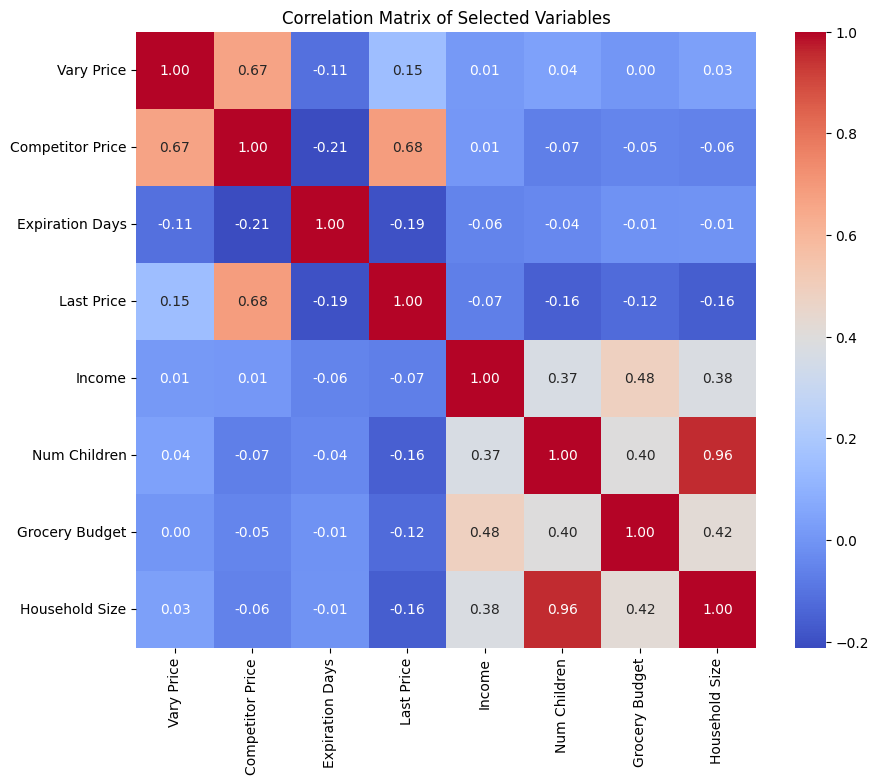

In [ ]:
# prompt: 提取出除了regularprice，Competitor Price，Expiration Days ，last Price，purchase desicion以外的其他列，把precentcom重命名为Competitor Price，把precentday重命名为Expiration Days,把precentlast重命名为last Price绘制出这几个变量的相关系数矩阵，varyprice 放第一个，截图存为corr

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'averaged_result' DataFrame is already defined from previous code

# Select columns, rename, and reorder
selected_df = averaged_result[['Vary Price', 'precentcom', 'precentday', 'precentlast', 'Income', 'Num Children', 'Grocery Budget', 'Household Size']]
selected_df = selected_df.rename(columns={
    'precentcom': 'Competitor Price',
    'precentday': 'Expiration Days',
    'precentlast': 'Last Price'
})

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables')
plt.savefig('corr.png') # Save the plot as corr.png
plt.show()


In [ ]:
# prompt: 下面，提取出，precentday ，Purchase Decision，Vary Price，precentcom ，precentlast这五列，进行以下平均，第1行，第12行，第23行，第34行直到第430行进行平均，得到对应5个平均的precentday，Purchase Decision，Vary Price，precentcom ，precentlast，放在新变量的第一行，之后第2行，第13行，第23行，第35行直到第431行进行平均，得到对应5个平均的Expiration Days ，Purchase Decision，Vary Price，precentcom ，precentlast，放在新变量第2行，以此类推，最后之后第11行，第22行，第33行，第44行直到第440行进行平均，得到对应5个平均的precentday，Purchase Decision，Vary Price，precentcom ，precentlast，放在新变量第10行，以此类推，最后得到一个11行，5列的新变量’

import pandas as pd
import numpy as np

# Assuming 'averaged_result' DataFrame is already defined from previous code

# Create a new DataFrame for the results
new_df = pd.DataFrame(columns=['precentday', 'Purchase Decision', 'Vary Price', 'precentcom', 'precentlast'])


for i in range(11):
  temp_list = []
  for j in range(i, len(averaged_result), 11):
    temp_list.append(j)

  row_data = averaged_result.iloc[temp_list][['precentday', 'Purchase Decision', 'Vary Price', 'precentcom', 'precentlast']].mean()
  new_df.loc[len(new_df)] = row_data

new_df


,precentday,Purchase Decision,Vary Price,precentcom,precentlast
0,1.188459,0.965000,0.0,91.557590,98.358148
1,1.153179,0.990833,20.0,80.543823,92.528003
2,1.119251,0.989167,40.0,76.176143,90.895097
3,1.079426,0.993333,60.0,83.689002,92.109864
4,1.019859,0.990833,80.0,94.722612,92.667226
5,0.908608,0.993333,100.0,100.791593,91.834556
6,1.050403,0.992500,120.0,118.921372,96.067094
7,0.990163,0.991667,140.0,135.258991,99.997337
8,1.085919,0.991667,160.0,149.661137,103.661256
9,0.978433,0.993333,180.0,166.321586,107.806198


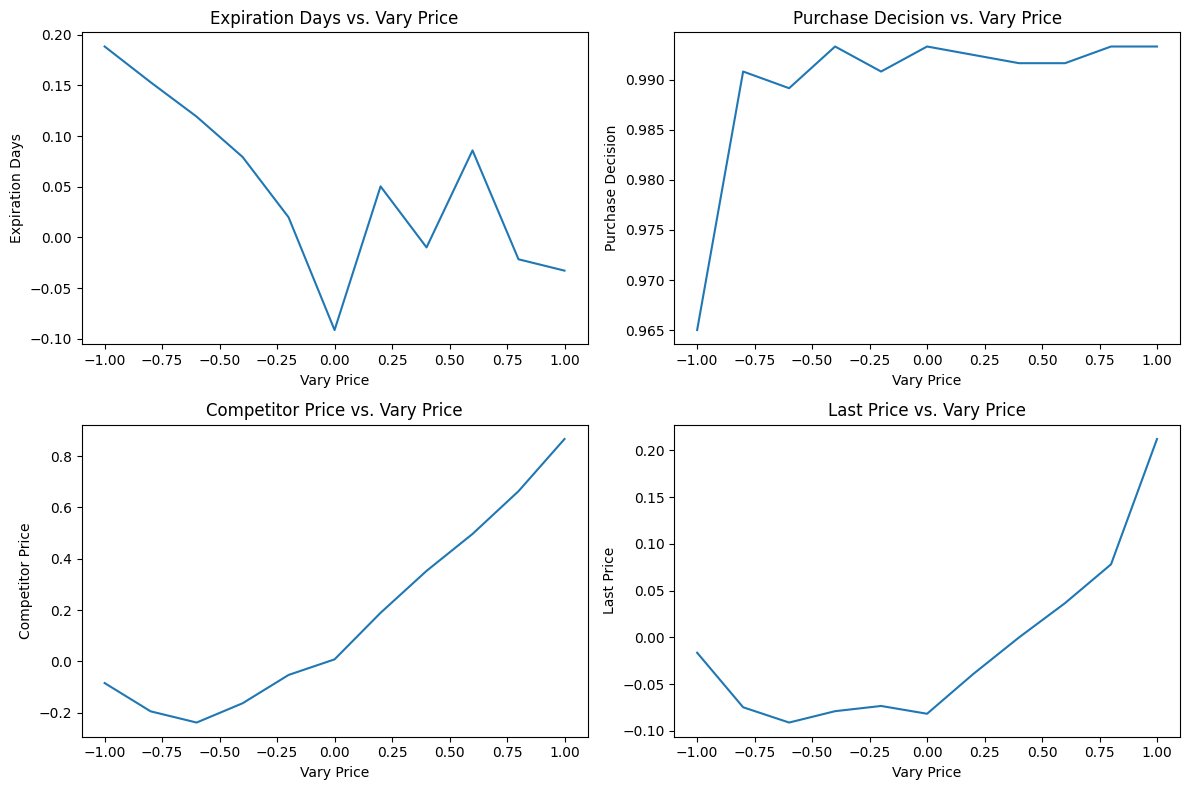

In [ ]:
# prompt: 首先，先把 precentday, precentcom precentlast 以及varyprice都除以100，画四个折线图，横轴为Vary price减去1（这意味着中心点为0(该轴重命名为Vary price），纵轴分别为新的precentday的减去1(该轴重命名为Expiration Days)，	Purchase Decision，新的precentcom减去1(该轴重命名为Competitor Price)和新的precentlast减去一(该轴重命名为last Price)

import matplotlib.pyplot as plt

# Assuming 'new_df' DataFrame is already defined from previous code

# Normalize the data
new_df['precentday'] = new_df['precentday']
new_df['precentcom'] = new_df['precentcom'] / 100
new_df['precentlast'] = new_df['precentlast'] / 100
new_df['Vary Price'] = new_df['Vary Price'] / 100


# Create the plots
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(new_df['Vary Price'] - 1, new_df['precentday'] - 1)
plt.xlabel('Vary Price')
plt.ylabel('Expiration Days')
plt.title('Expiration Days vs. Vary Price')

plt.subplot(2, 2, 2)
plt.plot(new_df['Vary Price'] - 1, new_df['Purchase Decision'])
plt.xlabel('Vary Price')
plt.ylabel('Purchase Decision')
plt.title('Purchase Decision vs. Vary Price')

plt.subplot(2, 2, 3)
plt.plot(new_df['Vary Price'] - 1, new_df['precentcom'] - 1)
plt.xlabel('Vary Price')
plt.ylabel('Competitor Price')
plt.title('Competitor Price vs. Vary Price')

plt.subplot(2, 2, 4)
plt.plot(new_df['Vary Price'] - 1, new_df['precentlast'] - 1)
plt.xlabel('Vary Price')
plt.ylabel('Last Price')
plt.title('Last Price vs. Vary Price')

plt.tight_layout()
plt.show()
